<a href="https://colab.research.google.com/github/paul-williams-ch-ml/ML/blob/master/clustering/K-Means%20%26%20Mini-Batch%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means & Mini-Batch K-Means
**sklearn.cluster.KMeans** is the standard K-Means clusturing function. When it is used, all data must be loaded into memory for processing. This is fine if you have small datasets that easily fit into the RAM memory of your system. If the dataset is greater than the physical RAM of your system, then you should consider using **sklearn.cluster.MiniBatchKMeans**. This will give similar results an KMean, but will process that dataset in small batches and then combine to results.

First we import the Iris dataset and print out the column headers.

In [0]:
from sklearn.datasets import load_iris

In [5]:
data     = load_iris()
print("Features :%s" % data.feature_names)
features = data.data
labels   = data.target

Features :['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## K-Means

In [0]:
from sklearn.cluster import KMeans

In [7]:
k_means = KMeans(n_clusters   = 3, \
                 init         = 'k-means++', \
                 max_iter     = 999, \
                 n_init       = 1, \
                 random_state = 101)
k_means.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=999,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

Plot our K-Means results

**NOTE: ** %matplotlib inline allows the plots to be embeded into the Notebook.


Text(0, 0.5, 'sepal width (cm)')

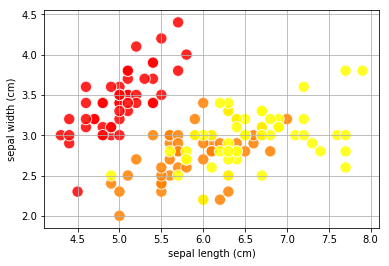

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(features[:,0], \
            features[:,1], \
            s          = 2**7, \
            c          = labels, \
            edgecolors = 'white', \
            alpha      = 0.85, \
            cmap       = 'autumn')

plt.grid() 

plt.xlabel(data.feature_names[0]) 
plt.ylabel(data.feature_names[1]) 

Add a grid and labels